The goal is to simulate the wavefront surface composed of single zernikes, and test how it is recovered given different rotation angles

In [2]:
%matplotlib inline
import os
import sys
sys.path.append('/project/scichris/aos/')
import analysisTools as at
import imp
imp.reload(at)

x,y = at.get_xy_from_yaml(get_actuators=True)


Obtaining x,y locations for 156 axial actuators 
from  /project/scichris/aos/ts_ofc/policy/M1M3/M1M3_1um_156_force.yaml


In [3]:
from lsst.ts.wep.cwfs.Tool import ZernikeAnnularFit, ZernikeAnnularEval
# calculate the wavefront surface given Zk values
import numpy as np

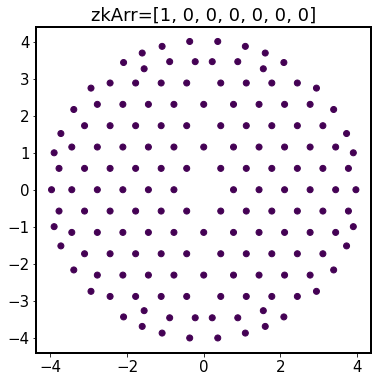

In [5]:
import matplotlib.pyplot as plt
for 
#zk1 = piston
zkArray = [1,0,0,0,0,0,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

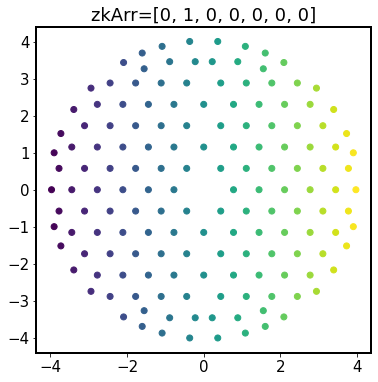

In [6]:
#zk2 = horizontal tilt
zkArray = [0,1,0,0,0,0,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

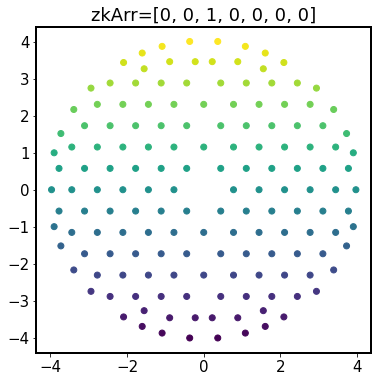

In [7]:
#zk3 = vertical tilt
zkArray = [0,0,1,0,0,0,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

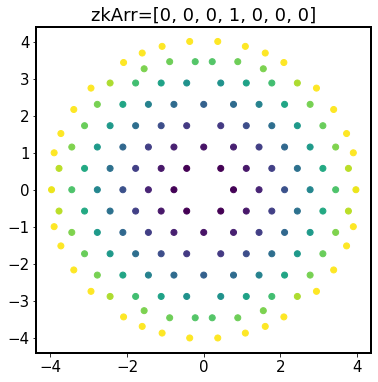

In [8]:
#zk4 = defocus
zkArray = [0,0,0,1,0,0,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

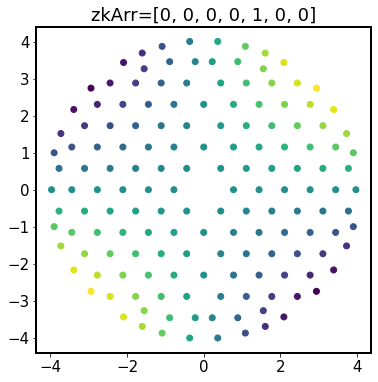

In [9]:
#zk5 = oblique astigmatism
zkArray = [0,0,0,0,1,0,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

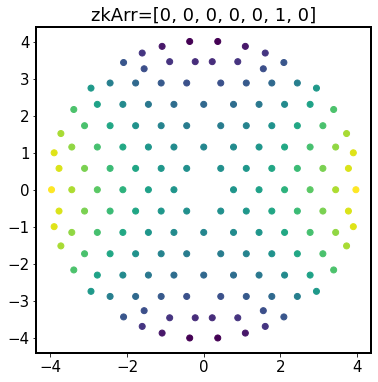

In [10]:
#zk6 = vertical astigmatism
zkArray = [0,0,0,0,0,1,0]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

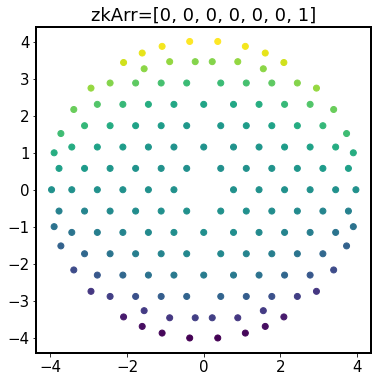

In [11]:
#zk7 = vertical coma
zkArray = [0,0,0,0,0,0,1]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

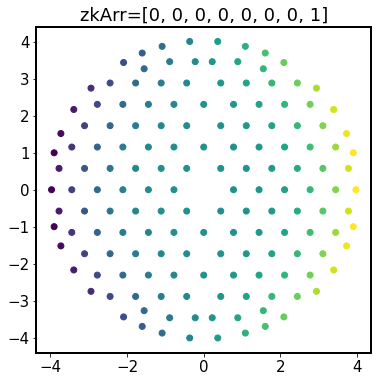

In [12]:
#zk8 = horizontal coma
zkArray = [0,0,0,0,0,0,0,1]
zkVal = ZernikeAnnularEval(zkArray,
                           np.array(x), np.array(y), e=0.61)
fig,ax  = plt.subplots(1,1,figsize=(6,6))
plt.title(f'zkArr={zkArray}')
plt.scatter(x,y,c=zkVal)

ok, so the zkVal look fine - they do represent the Zernike polynomials evaluated on a space of actuators

In [16]:
from lsst.ts.phosim.telescope.M1M3Sim import M1M3Sim
import numpy as np
m1m3 = M1M3Sim()
x,y = at.get_xy_from_yaml(get_actuators=False)

Obtaining x,y locations for 5256 grid locations 
from  /project/scichris/aos/ts_phosim/policy/M1M3/M1M3_1um_156_grid.yaml


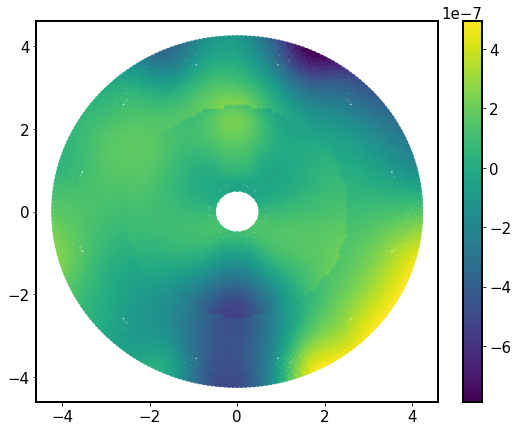

In [26]:
fig,ax  = plt.subplots(1,1,figsize=(9,7))
zkSurfInM = m1m3.genMirSurfFromZk(zAngleInRadian=0, zkArray=[0,0, 1])
plt.scatter(x,y,c=zkSurfInM)
plt.colorbar()

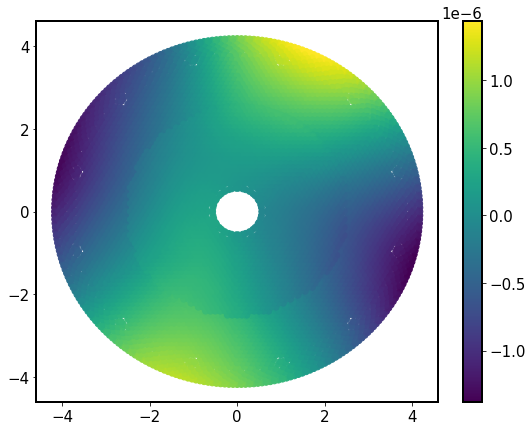

In [25]:
randSurfInM = m1m3.genMirSurfRandErr(zAngleInRadian=0)
fig,ax  = plt.subplots(1,1,figsize=(9,7))
plt.scatter(x,y,c=randSurfInM)
plt.colorbar()


## The result of running zk2 ([0,1,0,0])

In `/python/lsst/ts/phosim/telescope/TeleFacade.py` I have 

    zkArray = [0,1,0,0]
    randSurfInM = self.m1m3.genMirSurfFromZk(zAngleInRad, zkArray)
    print(f'\nUsed {zkArray} for m1m3 mirror surface')

Interesting... The input is `zk2` , which is horizontal tilt, but the donut looks like `zk5` which is oblique astigmatism... 




### For rotcam=0

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106001}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106001}


/project/scichris/aos/analysisTools.py:222: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


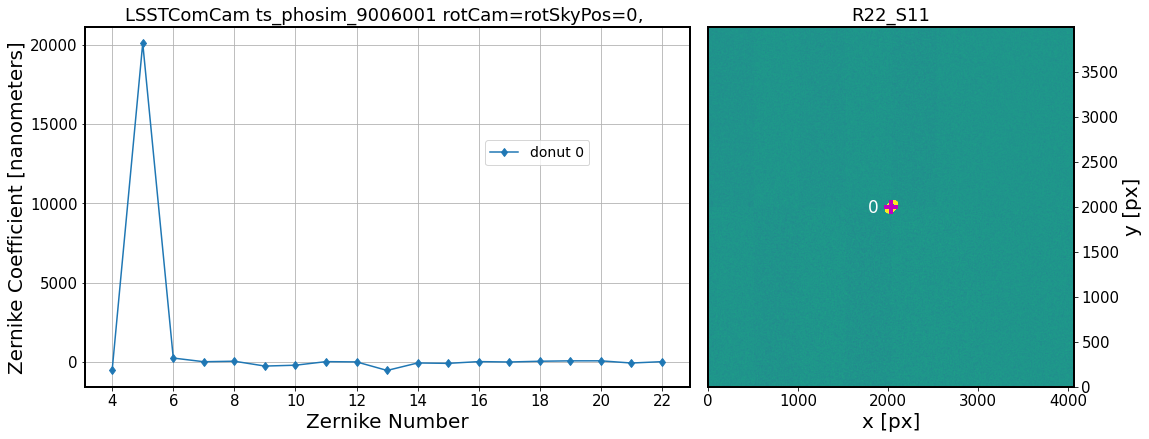

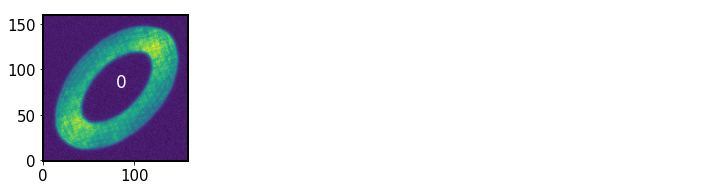

In [27]:
data_dir = '/project/scichris/aos/rotation_DM-34065/test1_rotCam_0_zk/'
iterN = 0
repoDir = os.path.join(data_dir, 'phosimData')
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterN}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= 'rotCam=rotSkyPos=0, ')



### For rotcam=30

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106001}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106001}


/project/scichris/aos/analysisTools.py:222: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


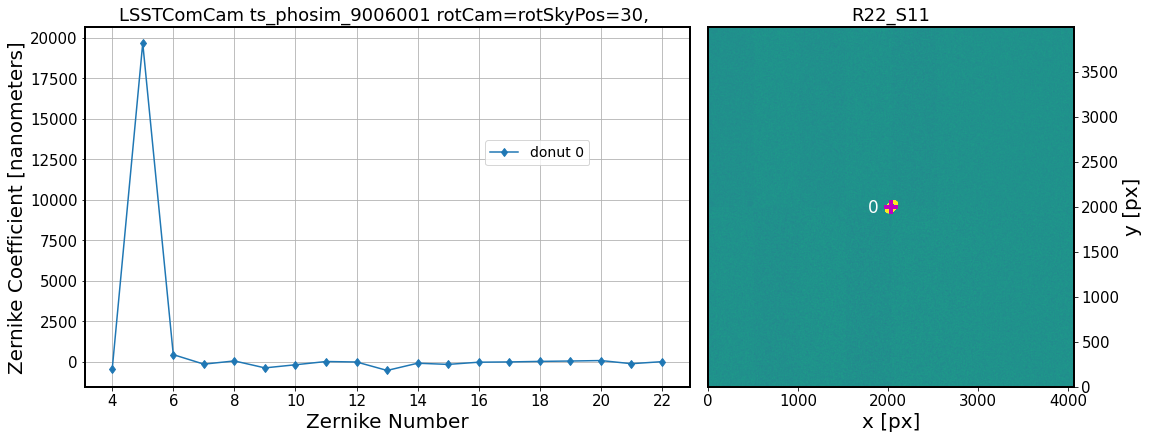

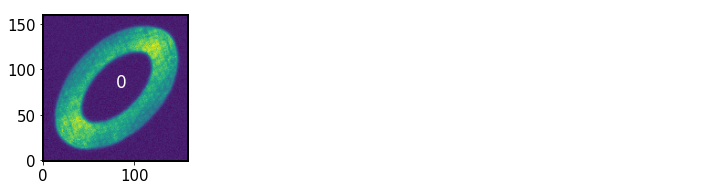

In [28]:
data_dir = '/project/scichris/aos/rotation_DM-34065/test1_rotCam_30_zk/'
iterN = 0
repoDir = os.path.join(data_dir, 'phosimData')
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterN}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= 'rotCam=rotSkyPos=30, ')



### For rotcam=-60

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106001}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106001}


/project/scichris/aos/analysisTools.py:222: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


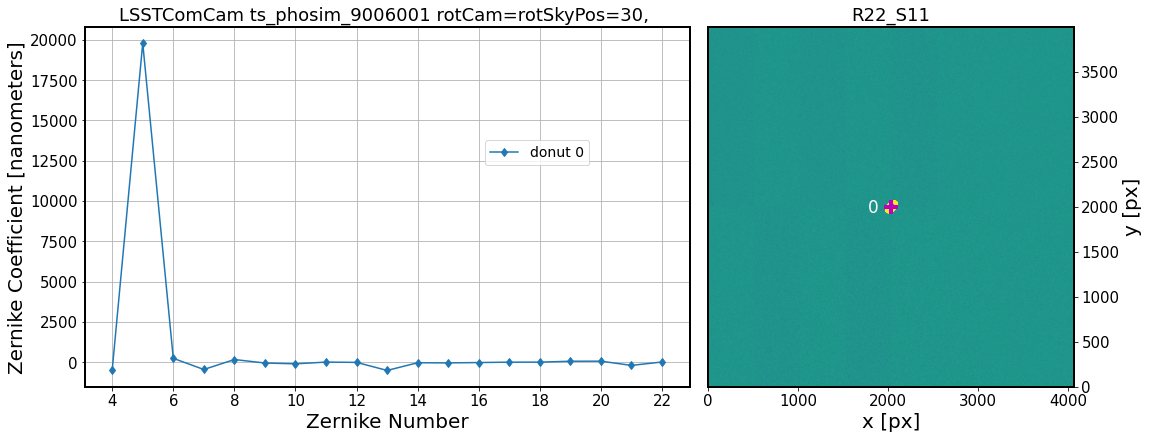

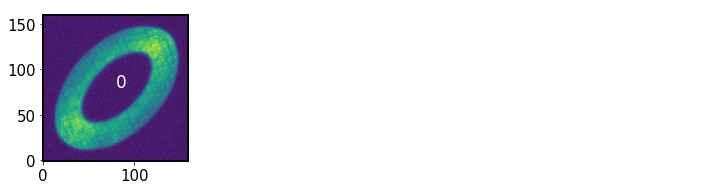

In [30]:
data_dir = '/project/scichris/aos/rotation_DM-34065/test1_rotCam_60n_zk/'
iterN = 0
repoDir = os.path.join(data_dir, 'phosimData')
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterN}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= 'rotCam=rotSkyPos=30, ')



## For rotCam =0, input of zk3=[0,0,1]

Submitted as 

    python /project/scichris/aos/ts_phosim/bin.src/imgCloseLoop.py --inst comcam --numOfProc 55  --rotCam 0 --m1m3FErr 0.05 --m3m3FFunc zernike  --clobber --output /project/scichris/aos/rotation_DM-34065/test1_rotCam_0_zk3/
    
    more slurm-60480.out 